# For-Hire Vehicle Trip Analysis

## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!if not exist "./data/" mkdir data

!curl -o "./data/fhv_tripdata_2024-01.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-01.parquet"
!curl -o "./data/fhv_tripdata_2024-02.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-02.parquet"
!curl -o "./data/fhv_tripdata_2024-03.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-03.parquet"
!curl -o "./data/fhv_tripdata_2024-04.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-04.parquet"
!curl -o "./data/fhv_tripdata_2024-05.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-05.parquet"
!curl -o "./data/fhv_tripdata_2024-06.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-06.parquet"
!curl -o "./data/fhv_tripdata_2024-07.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-07.parquet"

!curl -o "./data/zone_lookup.csv" "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 21 14.3M   21 3095k    0     0  1961k      0  0:00:07  0:00:01  0:00:06 1961k
 63 14.3M   63 9265k    0     0  3788k      0  0:00:03  0:00:02  0:00:01 3789k
100 14.3M  100 14.3M    0     0  4616k      0  0:00:03  0:00:03 --:--:-- 4618k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 10 12.9M   10 1446k    0     0  1163k      0  0:00:11  0:00:01  0:00:10 1163k
 43 12.9M   43 5841k    0     0  2552k      0  0:0

In [2]:
total_df = None
for idx in range(1, 8):
    tmp_df = pd.read_parquet(f"./data/fhv_tripdata_2024-{idx:02}.parquet", engine="pyarrow")
    if total_df is None:
        total_df = tmp_df
        continue
    total_df = pd.concat([total_df, tmp_df], axis=0, ignore_index=True)
print(total_df.shape)
print(total_df.head())

(9501967, 7)
  dispatching_base_num     pickup_datetime    dropOff_datetime  PUlocationID  \
0               B00053 2024-01-01 00:15:00 2024-01-01 02:13:00           NaN   
1               B00111 2024-01-01 00:30:00 2024-01-01 02:37:00           NaN   
2               B00112 2024-01-01 00:27:24 2024-01-01 01:12:05           NaN   
3               B00112 2024-01-01 00:10:09 2024-01-01 00:25:39           NaN   
4               B00112 2024-01-01 00:57:07 2024-01-01 01:05:04           NaN   

   DOlocationID  SR_Flag Affiliated_base_number  
0           NaN      NaN                 B00014  
1           NaN      NaN                 B00111  
2          14.0      NaN                 B00112  
3         133.0      NaN                 B00112  
4          14.0      NaN                 B00112  


In [3]:
service_zones = pd.read_csv("data/zone_lookup.csv")
print(service_zones.shape)
print(service_zones.head())

(265, 4)
   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


## Basic Problems

Here are 4 basic data analytics problems that can be explored using the dataset.

### 1. What are the peak hours for pickups and drop-offs

    Pickup Count  Dropoff Count
0         158387         177308
1         109664         123789
2          83270          89190
3          83576          78451
4         138770         120793
5         190502         166824
6         302944         236924
7         514671         415470
8         672087         615578
9         747535         742220
10        722106         732748
11        667181         668503
12        664304         662468
13        641395         650355
14        606753         604941
15        545968         561427
16        486766         511219
17        433242         466160
18        372378         419910
19        323848         355901
20        297243         311225
21        275716         286899
22        250472         268322
23        213189         235342


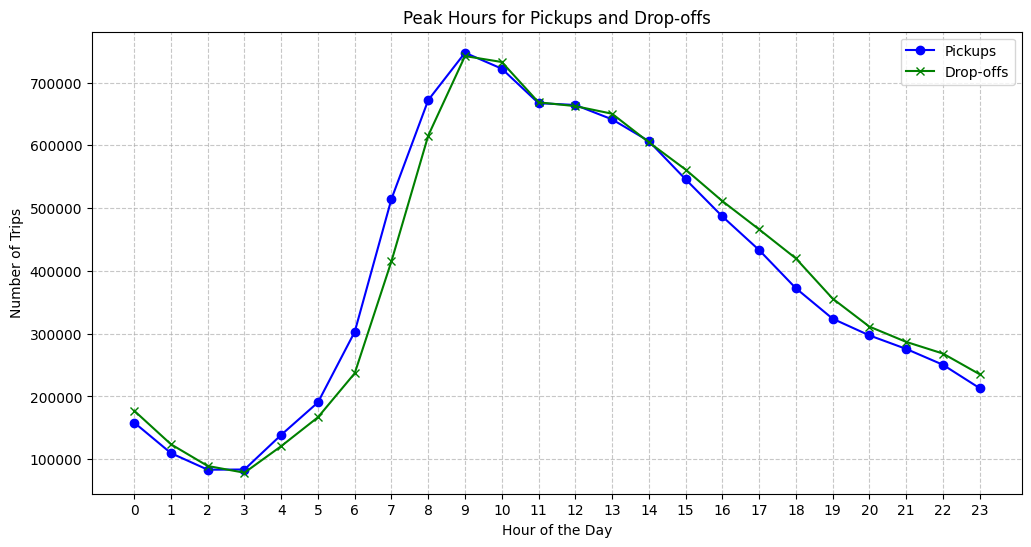

In [11]:
# Count pickups and drop-offs per hour
pickup_counts = total_df['pickup_datetime'].dt.hour.value_counts().sort_index()
dropoff_counts = total_df['dropOff_datetime'].dt.hour.value_counts().sort_index()
pickup_dropoff_counts = pd.concat([pickup_counts, dropoff_counts], axis=1)
pickup_dropoff_counts.columns = ['Pickup Count', 'Dropoff Count']
print(pickup_dropoff_counts)

# Plotting the peak hours for pickups and drop-offs
plt.figure(figsize=(12, 6))
plt.plot(pickup_counts.index, pickup_counts, marker='o', linestyle='-', label='Pickups', color='blue')
plt.plot(dropoff_counts.index, dropoff_counts, marker='x', linestyle='-', label='Drop-offs', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Peak Hours for Pickups and Drop-offs')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### 2. What does the distribution of trip duration look like

C:\Users\sunsh\AppData\Local\Temp\ipykernel_23932\1280650167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['Duration Category'] = pd.cut(valid_df['trip_duration_min'], bins=duration_bins)


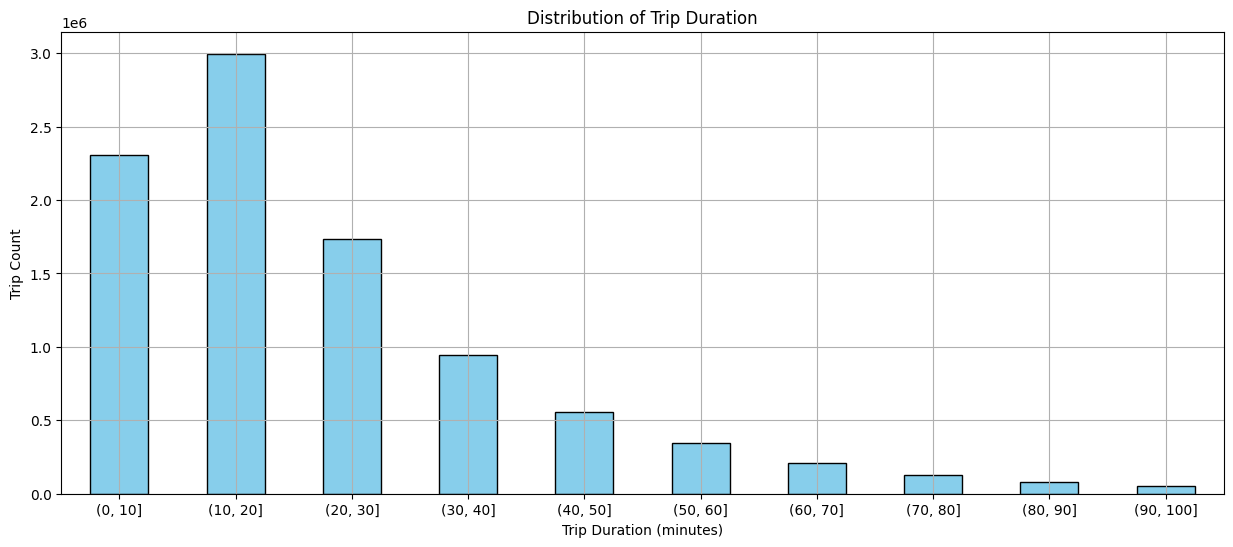

In [19]:
# Calculating trip duration in minutes
total_df['trip_duration_min'] = (pd.to_datetime(total_df['dropOff_datetime']) - pd.to_datetime(total_df['pickup_datetime'])).dt.total_seconds() / 60
valid_df = total_df[total_df['trip_duration_min'] <= 100]

# Count the number of trips for each category
duration_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valid_df['Duration Category'] = pd.cut(valid_df['trip_duration_min'], bins=duration_bins)

count_by_duration = valid_df['Duration Category'].value_counts().sort_index()

# Plotting the distribution of trip duration
plt.figure(figsize=(15, 6))
count_by_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Trip Count')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

### 3. Which locations are the most common pickup and drop-off points

   Pickup Count  Drop-off Count                       Zone
0       53386.0           42297                  Stapleton
1       52715.0           57558  Saint George/New Brighton
2       32295.0           43033                     Corona
3       32032.0           61624                   Flushing
4       30655.0           71891            Jackson Heights
5       29384.0           32491   South Beach/Dongan Hills
6       28252.0           32455                  Homecrest
7       27581.0           31396    Bloomfield/Emerson Hill
8       27097.0           25246             Brighton Beach
9       26399.0           34851             Sheepshead Bay


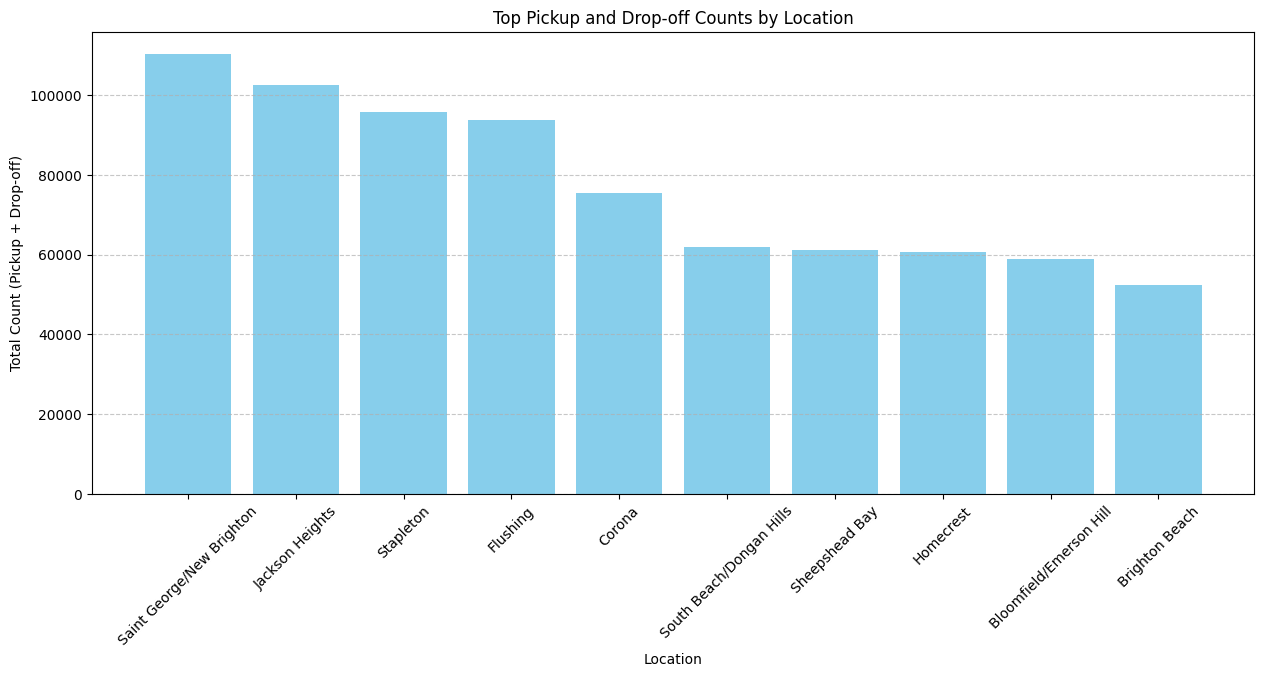

In [22]:
# Count the most common pickup locations
pickup_counts = total_df['PUlocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup Count']

# Count the most common drop-off locations
dropoff_counts = total_df['DOlocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Drop-off Count']

# Merge the two counts to see both pickup and drop-off together
combined_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
combined_counts = combined_counts.sort_values(['Pickup Count', 'Drop-off Count'], ascending=[False, False]).head(10)
combined_counts_with_location = pd.merge(combined_counts, service_zones, on='LocationID', how='left').fillna('').drop(columns=['LocationID', 'Borough', 'service_zone'])
print(combined_counts_with_location)

# Combine pickup and drop-off counts for plotting
combined_counts_with_location['Total Count'] = combined_counts_with_location['Pickup Count'] + combined_counts_with_location['Drop-off Count']
combined_counts_with_location = combined_counts_with_location.sort_values(by='Total Count', ascending=False)

# Plotting the combined counts
plt.figure(figsize=(15, 6))
plt.bar(combined_counts_with_location['Zone'].astype(str), combined_counts_with_location['Total Count'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Total Count (Pickup + Drop-off)')
plt.title('Top Pickup and Drop-off Counts by Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### 4. What is the percentage of shared rides among all the trips

   Total Trips  Shared Trips  Percentage of Shared Trips
0      9501967             0                         0.0


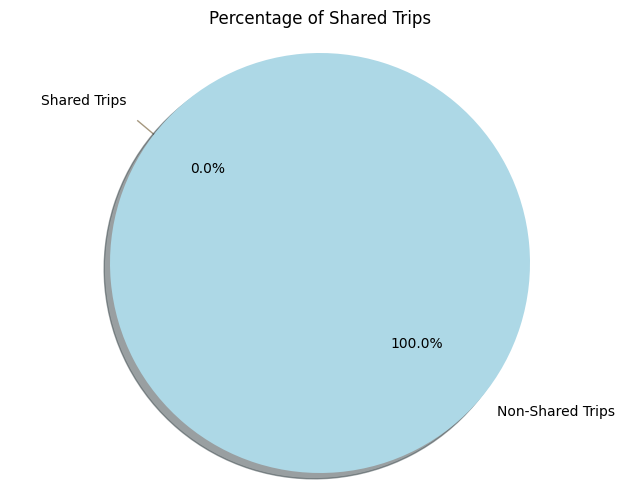

In [24]:
total_trips = len(total_df)
shared_trips = len(total_df[total_df['SR_Flag'] == 1])
percentage = (shared_trips / total_trips) * 100

result_df = pd.DataFrame({
    'Total Trips': [total_trips],
    'Shared Trips': [shared_trips],
    'Percentage of Shared Trips': [round(percentage, 2)]
})

print(result_df)

labels = ['Shared Trips', 'Non-Shared Trips']
sizes = [shared_trips, total_trips - shared_trips]
colors = ['orange', 'lightblue']
explode = (0.1, 0)  # explode the slice with shared trips

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Shared Trips')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()